# Read image from csv file

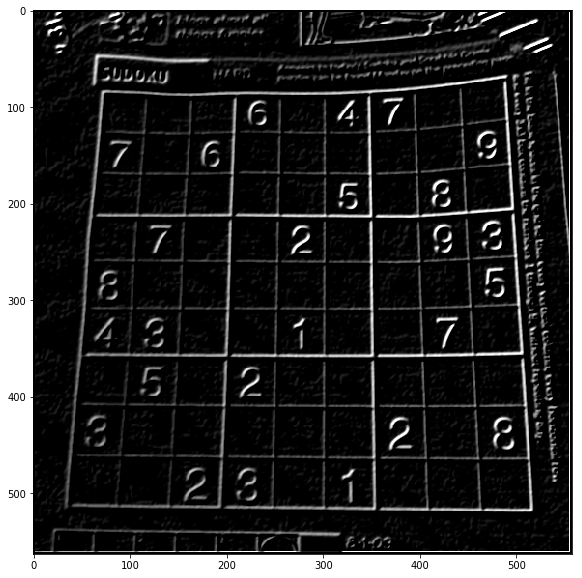

In [5]:
import numpy as np
import matplotlib.pyplot as plt

img_data = np.genfromtxt('./zybo/image_processed.csv', delimiter=',',dtype="uint8")
img_data = img_data.reshape((563, -1))

plt.figure(figsize=(10,10))
plt.imshow(img_data,cmap="gray")

# Run executable in visual studio and plot image

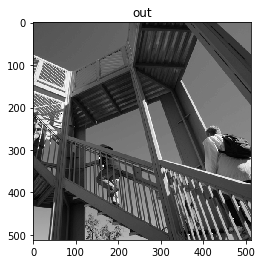

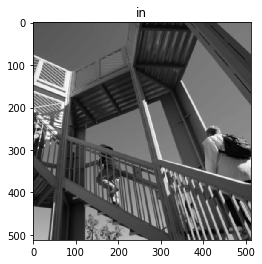

In [11]:
import scipy.misc
import struct
import os
rows = 512
cols = 512
baseDir = "./zybo/build/Debug/"
data = np.random.rand(50,50)
data = scipy.misc.ascent()

#data = np.ones((5,10))*np.linspace(1,10,10)
data = np.array(data,dtype="float32").reshape(-1)


with open("in_file","wb") as f:
    for d in data:
        f.write(struct.pack("@f",d))

plt.figure()
plt.title("out")
plt.imshow(data.reshape(rows,-1),cmap="gray")

import subprocess
programPath = os.path.join(baseDir,"main.exe")
subprocess.call([programPath])


plt.figure()
plt.title("in")
inp = np.fromfile("out_file",dtype="float32")
plt.imshow(inp.reshape(rows,cols),cmap="gray")